# Police violence + Gun laws 

Adding gun law information as a feature to Police Violence dataset

In [35]:
PV_gunlaw = pd.merge(PV_data, gunlaw_ranking, on='State')

In [36]:
PV_gunlaw.head()

,victim_age,victim_gender,victim_race,date,City,State,cause_of_death,criminal_charges,victim_armed,alleged_weapon,victim_fleeing,Gun LawStrength(Ranked),state_gunlaw_grade,Gun DeathRate(Ranked),state_gun_death_rate_per_100K
0,66.0,Male,hispanic,1970,Tyler,TX,Gunshot,No known charges,Allegedly Armed,unknown weapon,not fleeing,34,F,30,12.22
1,50.0,Female,unknown race,1970,Lubbock,TX,Gunshot,No known charges,Allegedly Armed,unknown weapon,not fleeing,34,F,30,12.22
2,66.0,Male,unknown race,1970,Corpus Christi,TX,Gunshot,No known charges,Allegedly Armed,gun,NaN,34,F,30,12.22
3,29.0,Male,unknown race,1970,Nederland,TX,Gunshot,No known charges,Allegedly Armed,gun,foot,34,F,30,12.22
4,25.0,Male,black,1970,Dallas,TX,Gunshot,No known charges,Allegedly Armed,gun,NaN,34,F,30,12.22


***

In [37]:
PV_data['victim_age'].min(), PV_data['victim_age'].max()

(1.0, 107.0)

In [38]:
PV_data.query('victim_age == 1')

,victim_age,victim_gender,victim_race,date,City,State,cause_of_death,criminal_charges,victim_armed,alleged_weapon,victim_fleeing
2883,1.0,Male,hispanic,1970,Laredo,TX,Other,Charged,Unarmed,no object,not fleeing
5733,1.0,Male,white,1970,Puryear,TN,Gunshot,Charged,Unarmed,no object,NaN
8338,1.0,Male,black,1970,Brooklyn,NY,Gunshot,No known charges,Unarmed,no object,NaN


In [39]:
PV_data['victim_age'] = PV_data['victim_age'].astype('float') #Some entries are of type 'str', so we had to convert to 'float'

In [40]:
PV_data.dtypes

victim_age          float64
victim_gender        object
victim_race          object
date                  int64
City                 object
State                object
cause_of_death       object
criminal_charges     object
victim_armed         object
alleged_weapon       object
victim_fleeing       object
dtype: object

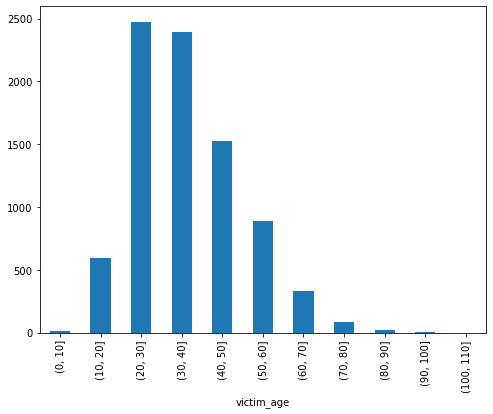

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

bins= [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110] #change this into something computed automatically using age.min and age.max
df = PV_data.groupby(pd.cut(PV_data['victim_age'], bins=bins)).victim_age.count()
df.plot(kind='bar')

In [42]:
PV_data['victim_race'].unique()

array(['hispanic', 'unknown race', 'white', 'black', 'native american',
       'asian', 'pacific islander'], dtype=object)

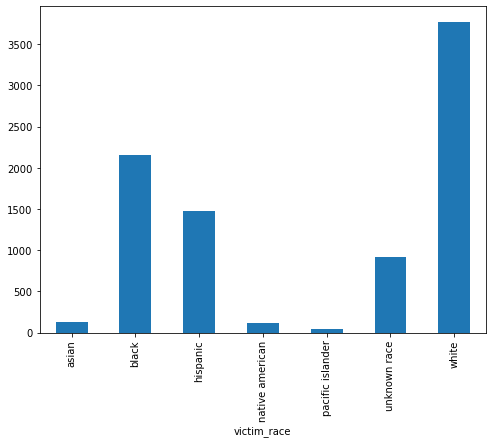

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

df = PV_data.groupby('victim_race').victim_race.count()
df.plot(kind='bar')

***

# Logistic Regression

In [44]:
PV_data

,victim_age,victim_gender,victim_race,date,City,State,cause_of_death,criminal_charges,victim_armed,alleged_weapon,victim_fleeing
0,66.0,Male,hispanic,1970,Tyler,TX,Gunshot,No known charges,Allegedly Armed,unknown weapon,not fleeing
1,42.0,Male,unknown race,1970,Hart County,KY,Gunshot,No known charges,Allegedly Armed,gun,other
2,28.0,Male,white,1970,St. Augustine,FL,Gunshot,No known charges,Allegedly Armed,gun,NaN
3,39.0,Male,unknown race,1970,La Vergne,TN,Gunshot,No known charges,Allegedly Armed,gun,car
4,32.0,Male,unknown race,1970,Batesville,IN,Gunshot,No known charges,Allegedly Armed,gun,not fleeing
...,...,...,...,...,...,...,...,...,...,...,...
8624,49.0,Male,hispanic,1970,Farmington,NM,Gunshot,No known charges,Allegedly Armed,blunt weapon,NaN
8625,31.0,Male,black,1970,Omaha,NE,Gunshot,No known charges,Allegedly Armed,gun,NaN
8626,21.0,Male,hispanic,1970,Pueblo,CO,Gunshot,No known charges,Allegedly Armed,gun,NaN
8627,21.0,Male,white,1970,Gordon,WI,Gunshot,No known charges,Allegedly Armed,gun,NaN


In [45]:
PV_data['criminal_charges'].unique()

array(['No known charges', 'Charged'], dtype=object)

In [46]:
PV_data.groupby('criminal_charges').count()

,victim_age,victim_gender,victim_race,date,City,State,cause_of_death,victim_armed,alleged_weapon,victim_fleeing
criminal_charges,,,,,,,,,,
Charged,146,146,146,146,146,146,146,146,146,82
No known charges,8191,8472,8483,8483,8477,8483,8483,8483,8483,5592


In [47]:
8602-266

8336

In [48]:
a = PV_data.dropna(subset=['criminal_charges'])
a.head()

,victim_age,victim_gender,victim_race,date,City,State,cause_of_death,criminal_charges,victim_armed,alleged_weapon,victim_fleeing
0,66.0,Male,hispanic,1970,Tyler,TX,Gunshot,No known charges,Allegedly Armed,unknown weapon,not fleeing
1,42.0,Male,unknown race,1970,Hart County,KY,Gunshot,No known charges,Allegedly Armed,gun,other
2,28.0,Male,white,1970,St. Augustine,FL,Gunshot,No known charges,Allegedly Armed,gun,NaN
3,39.0,Male,unknown race,1970,La Vergne,TN,Gunshot,No known charges,Allegedly Armed,gun,car
4,32.0,Male,unknown race,1970,Batesville,IN,Gunshot,No known charges,Allegedly Armed,gun,not fleeing


In [49]:
a['criminal_charges'].unique()

array(['No known charges', 'Charged'], dtype=object)

import statsmodels.formula.api as smf

#Make column 'decisions' numeric by replacing 'Accept' with 1 and 'Reject' with 0
def f(x):
    if x == 'Charged': 
        return 1
    else:
        return 0
    
a['criminal_charges'] = a.apply(lambda x: f(x['criminal_charges']), axis=1)

#Fit the regression model
results = smf.logit('criminal_charges ~ state_gunlaw_grade + victim_race', data=a).fit()

#Inspect the results
print(results.summary())

# Linear Regression:

In [50]:
data_per_state.head()

,State,total_pop,black_pop,hispanic_pop,white_pop,% Victims Black,Disparity,black_killings,hispanic_killings,white_killings,total_killings,black_rate,hispanic_rate,white_rate,total_rate,Disparity in Rate,Black-White Disparity,Hispanic-White Disparity
0,AL,4864680.0,1285737.0,203146.0,3196730.0,0.384058,0.119758,53.0,NaN,74.0,138.0,5.888785,0.000000,3.306951,4.052535,1.453111,1.780730,0.000000
1,AK,738516.0,22817.0,51186.0,450754.0,0.100000,0.069104,4.0,1.0,18.0,40.0,25.043983,2.790942,5.704727,7.737525,3.236692,4.390041,0.489233
2,AZ,6946685.0,286614.0,2163312.0,3825886.0,0.090909,0.049650,31.0,115.0,142.0,341.0,15.451344,7.594176,5.302227,7.012595,2.203370,2.914124,1.432262
3,AR,2990671.0,458536.0,219052.0,2173849.0,0.298077,0.144755,31.0,3.0,60.0,104.0,9.658067,1.956483,3.942973,4.967829,1.944122,2.449438,0.496195
4,CA,39148760.0,2164519.0,15221577.0,14695836.0,0.158609,0.103319,187.0,487.0,337.0,1179.0,12.341904,4.570580,3.275952,4.302271,2.868695,3.767425,1.395191


import statsmodels.api as sm

target = data_per_state[['total_killings']]

data = data_per_state[['State', 'state_gunlaw_grade']]

model = sm.OLS(target['total_killings'], data).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()

data.dtypes

***

# Plots

In [51]:
data_per_state.head()

,State,total_pop,black_pop,hispanic_pop,white_pop,% Victims Black,Disparity,black_killings,hispanic_killings,white_killings,total_killings,black_rate,hispanic_rate,white_rate,total_rate,Disparity in Rate,Black-White Disparity,Hispanic-White Disparity
0,AL,4864680.0,1285737.0,203146.0,3196730.0,0.384058,0.119758,53.0,NaN,74.0,138.0,5.888785,0.000000,3.306951,4.052535,1.453111,1.780730,0.000000
1,AK,738516.0,22817.0,51186.0,450754.0,0.100000,0.069104,4.0,1.0,18.0,40.0,25.043983,2.790942,5.704727,7.737525,3.236692,4.390041,0.489233
2,AZ,6946685.0,286614.0,2163312.0,3825886.0,0.090909,0.049650,31.0,115.0,142.0,341.0,15.451344,7.594176,5.302227,7.012595,2.203370,2.914124,1.432262
3,AR,2990671.0,458536.0,219052.0,2173849.0,0.298077,0.144755,31.0,3.0,60.0,104.0,9.658067,1.956483,3.942973,4.967829,1.944122,2.449438,0.496195
4,CA,39148760.0,2164519.0,15221577.0,14695836.0,0.158609,0.103319,187.0,487.0,337.0,1179.0,12.341904,4.570580,3.275952,4.302271,2.868695,3.767425,1.395191


In [52]:
df = data_per_state[['State', 'total_pop', 'white_pop', 'black_pop', 'hispanic_pop', 'total_killings', 'white_killings', 'black_killings', 'hispanic_killings']]

In [53]:
df['white_pop_percentage'] = np.around(df['white_pop']/df['total_pop']*100)
df['black_pop_percentage'] = np.around(df['black_pop']/df['total_pop']*100)
df['hispanic_pop_percentage'] = np.around(df['hispanic_pop']/df['total_pop']*100)


df['white_kill_percentage'] = np.around(df['white_killings']/df['total_killings']*100)
df['black_kill_percentage'] = np.around(df['black_killings']/df['total_killings']*100)
df['hispanic_kill_percentage'] = np.around(df['hispanic_killings']/df['total_killings']*100)

df['other_pop_percentage'] = 100 - (df['white_pop_percentage']+df['black_pop_percentage']+df['hispanic_pop_percentage'])
df['other_kill_percentage'] = 100 - (df['white_kill_percentage']+df['black_kill_percentage']+df['hispanic_kill_percentage'])

df.head()

<ipython-input-53-396b909b6b5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['white_pop_percentage'] = np.around(df['white_pop']/df['total_pop']*100)
<ipython-input-53-396b909b6b5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['black_pop_percentage'] = np.around(df['black_pop']/df['total_pop']*100)
<ipython-input-53-396b909b6b5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,State,total_pop,white_pop,black_pop,hispanic_pop,total_killings,white_killings,black_killings,hispanic_killings,white_pop_percentage,black_pop_percentage,hispanic_pop_percentage,white_kill_percentage,black_kill_percentage,hispanic_kill_percentage,other_pop_percentage,other_kill_percentage
0,AL,4864680.0,3196730.0,1285737.0,203146.0,138.0,74.0,53.0,NaN,66.0,26.0,4.0,54.0,38.0,NaN,4.0,NaN
1,AK,738516.0,450754.0,22817.0,51186.0,40.0,18.0,4.0,1.0,61.0,3.0,7.0,45.0,10.0,2.0,29.0,43.0
2,AZ,6946685.0,3825886.0,286614.0,2163312.0,341.0,142.0,31.0,115.0,55.0,4.0,31.0,42.0,9.0,34.0,10.0,15.0
3,AR,2990671.0,2173849.0,458536.0,219052.0,104.0,60.0,31.0,3.0,73.0,15.0,7.0,58.0,30.0,3.0,5.0,9.0
4,CA,39148760.0,14695836.0,2164519.0,15221577.0,1179.0,337.0,187.0,487.0,38.0,6.0,39.0,29.0,16.0,41.0,17.0,14.0


In [54]:
df=df.dropna(subset=['State'])

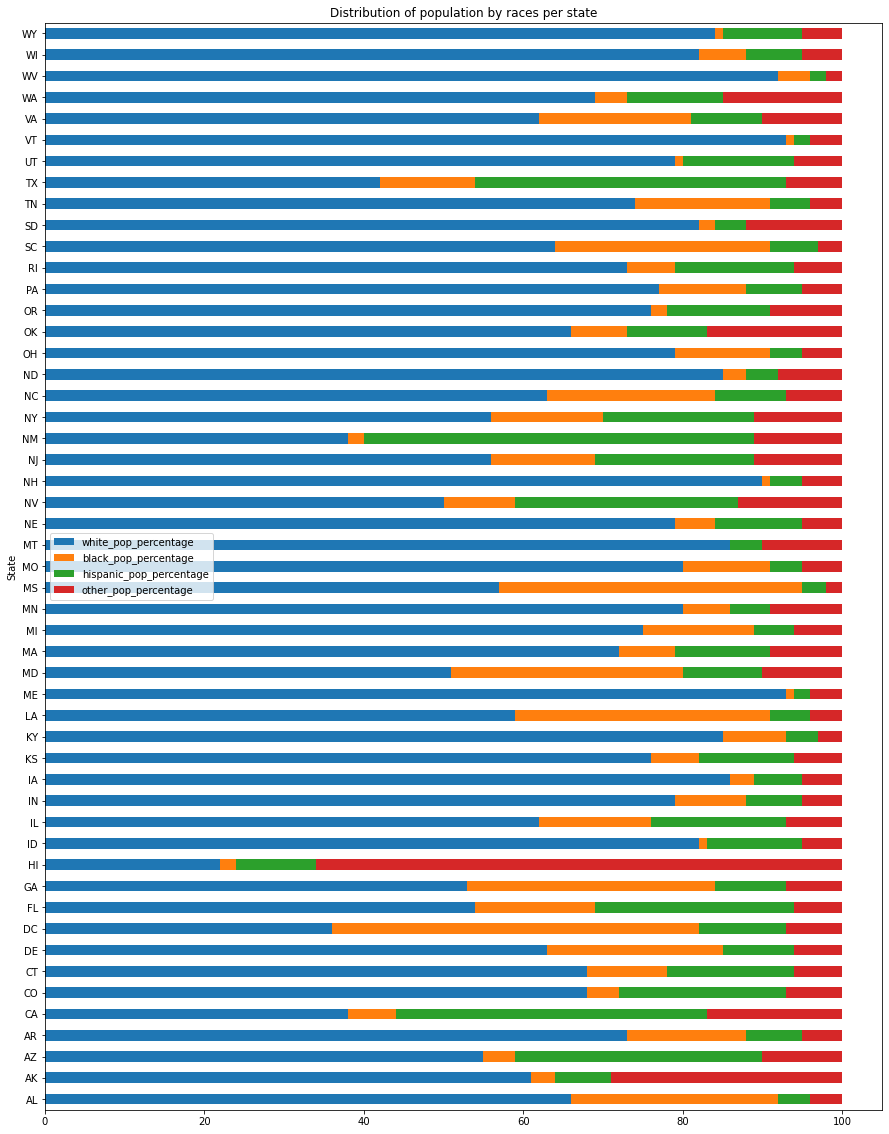

In [55]:
df_pop = df[['State', 'white_pop_percentage', 'black_pop_percentage', 'hispanic_pop_percentage', 'other_pop_percentage']]

fig,ax = plt.subplots()
fig.set_size_inches(15, 20)

df_pop.plot( 
    ax=ax,
    x = 'State',
    kind = 'barh', 
    stacked = True, 
    title = 'Distribution of population by races per state', 
    mark_right = True) 


In [56]:
df_kill = df[['State', 'white_kill_percentage', 'black_kill_percentage', 'hispanic_kill_percentage', 'other_kill_percentage']]
df_kill.head()

,State,white_kill_percentage,black_kill_percentage,hispanic_kill_percentage,other_kill_percentage
0,AL,54.0,38.0,NaN,NaN
1,AK,45.0,10.0,2.0,43.0
2,AZ,42.0,9.0,34.0,15.0
3,AR,58.0,30.0,3.0,9.0
4,CA,29.0,16.0,41.0,14.0


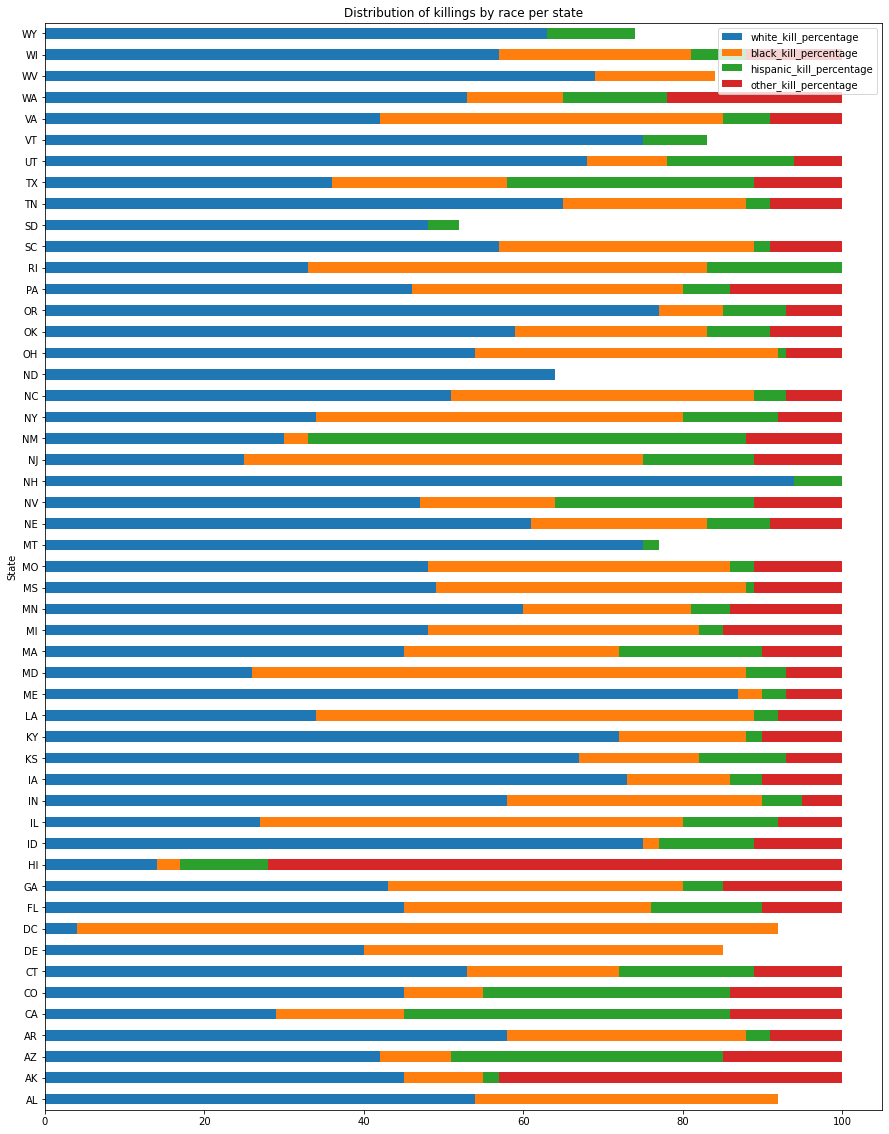

In [57]:
fig,ax = plt.subplots()
fig.set_size_inches(15, 20)

df_kill.plot( 
    ax=ax,
    x = 'State',
    kind = 'barh', 
    stacked = True, 
    title = 'Distribution of killings by race per state', 
    mark_right = True) 

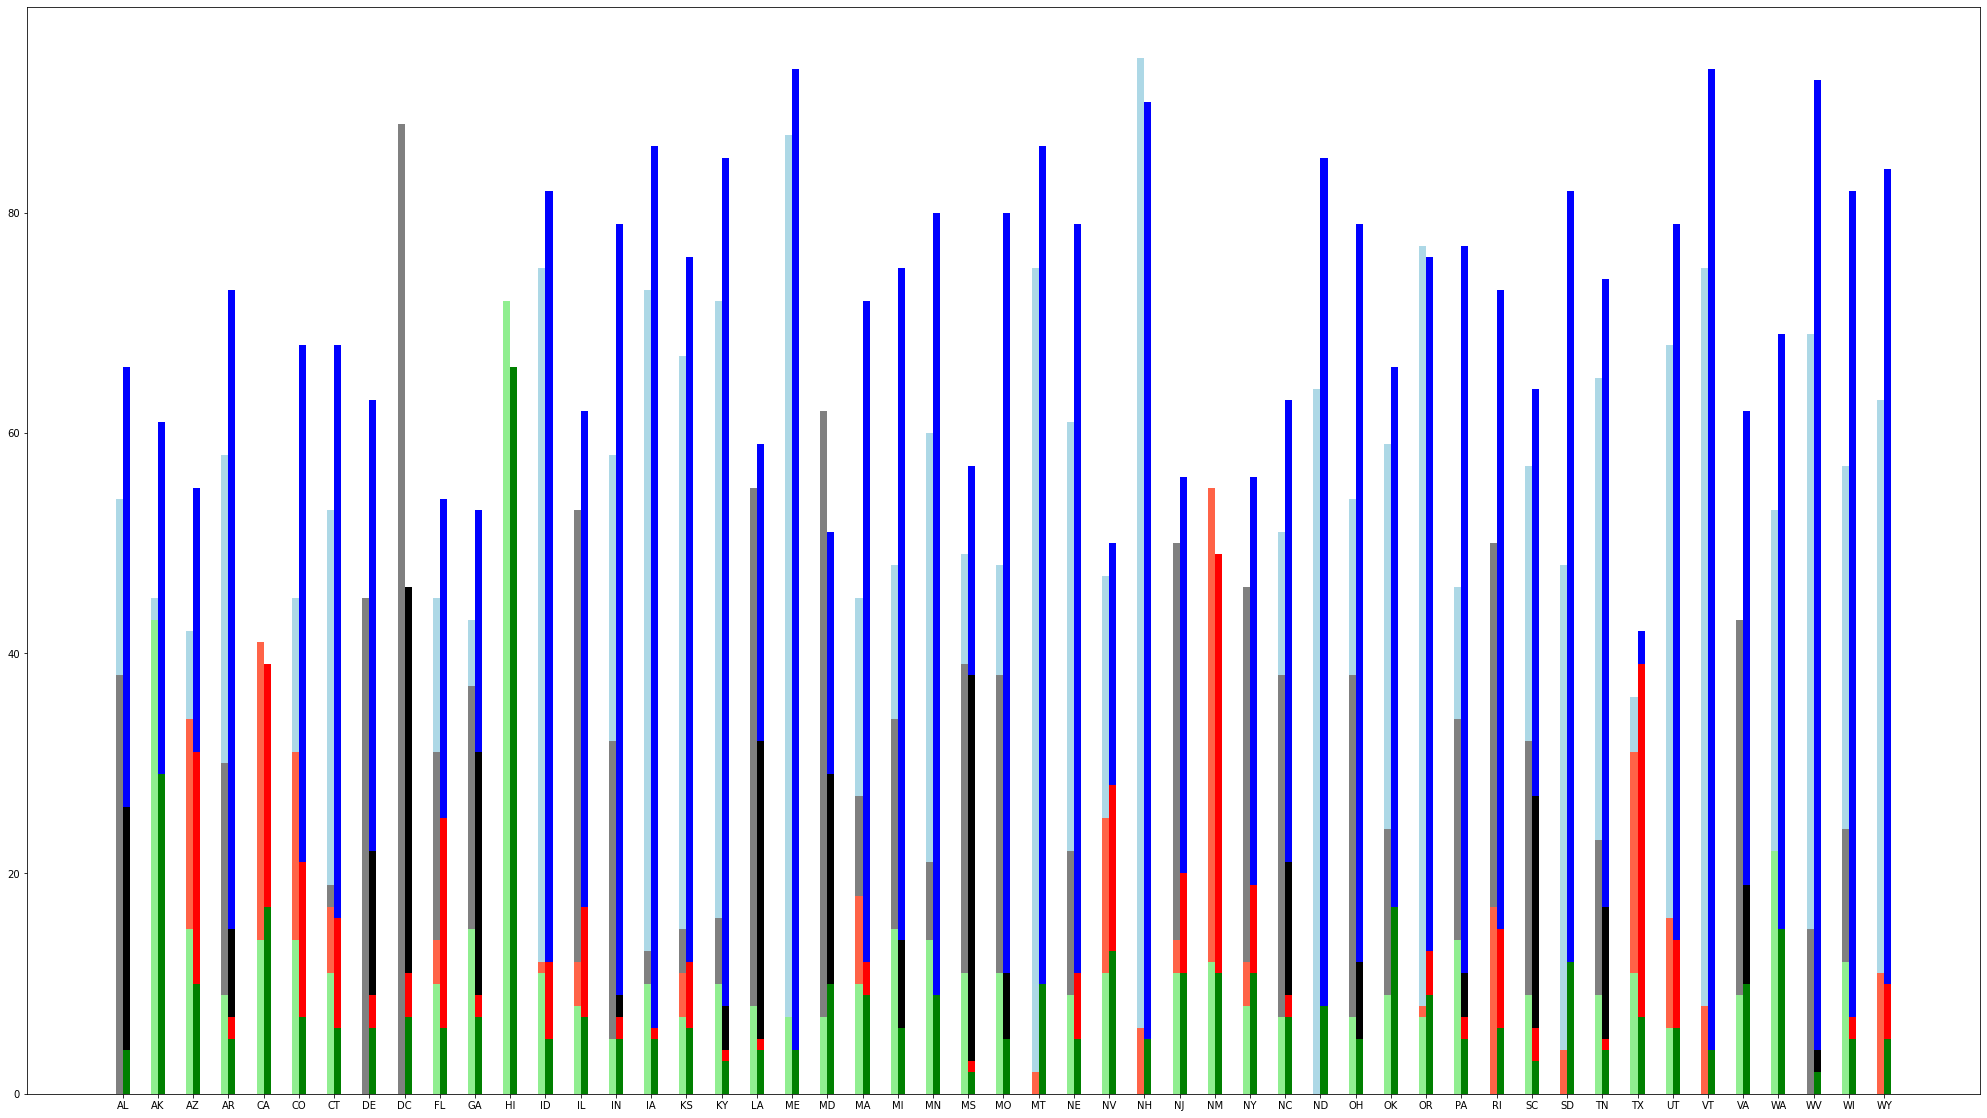

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(35, 20))

pop_bar_list = [plt.bar(df.State, df.white_pop_percentage, align='edge', width= 0.2, color="blue"),
               plt.bar(df.State, df.black_pop_percentage, align='edge', width= 0.2, color="black"),
               plt.bar(df.State, df.hispanic_pop_percentage, align='edge', width= 0.2, color="red"),
               plt.bar(df.State, df.other_pop_percentage, align='edge', width= 0.2, color="green")]

kill_bar_list = [plt.bar(df.State, df.white_kill_percentage, align='edge',width= -0.2, color="lightblue"),
                plt.bar(df.State, df.black_kill_percentage, align='edge',width= -0.2, color="grey"),
                plt.bar(df.State, df.hispanic_kill_percentage, align='edge',width= -0.2, color="tomato"),
                plt.bar(df.State, df.other_kill_percentage, align='edge',width= -0.2, color="lightgreen")]
